# Pre-Processing 

## Importing Libraries

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-bright')

## Grayscale

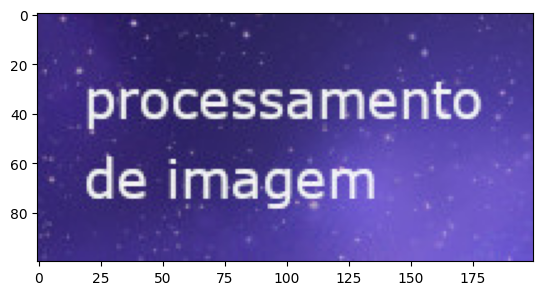

In [51]:
img = cv2.imread('Sources/Images/img-process.jpg')
plt.imshow(img)

In [52]:
img.shape

(100, 200, 3)

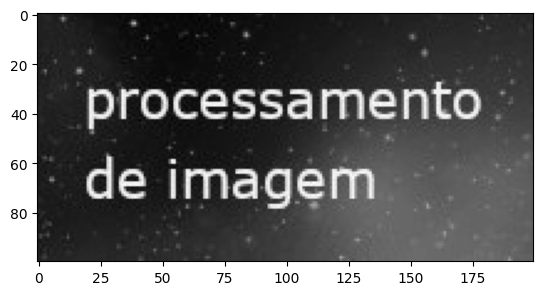

In [53]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [54]:
gray.shape

(100, 200)

## Thresholding

### Simple thresholding

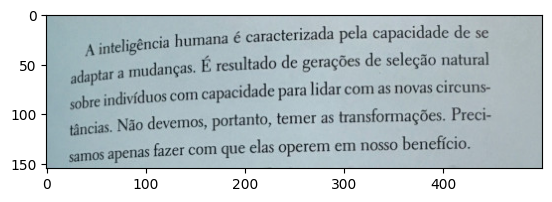

In [55]:
img = cv2.imread('Sources/Images/page-book.jpg')
plt.imshow(img)

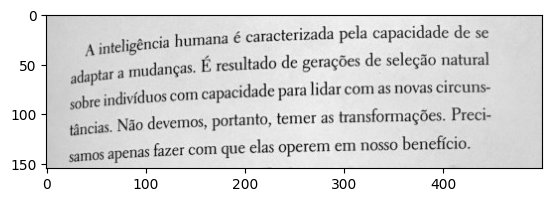

In [56]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

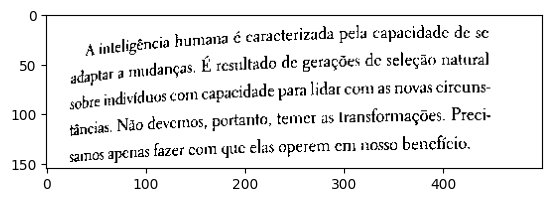

In [57]:
value, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

In [58]:
value

127.0

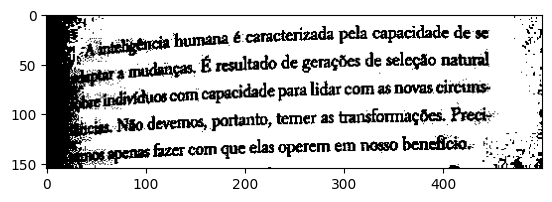

In [59]:
value, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

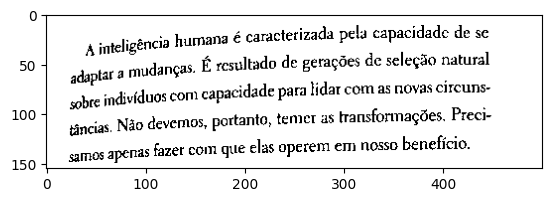

In [60]:
value, thresh = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

## Otsu Method

138.0


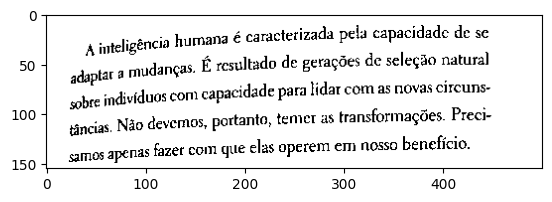

In [61]:
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(otsu, cmap='gray')
print(value)

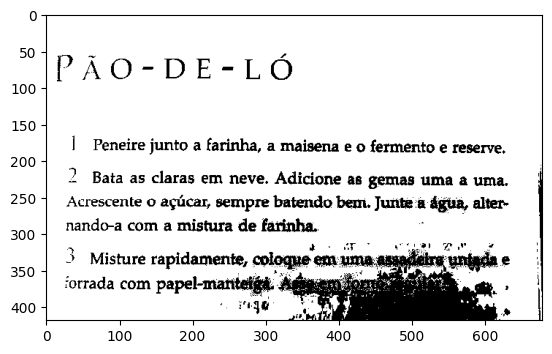

In [62]:
img = cv2.imread('Sources/Images/recipe01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
value, thresh = cv2.threshold(gray, 138, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

119.0


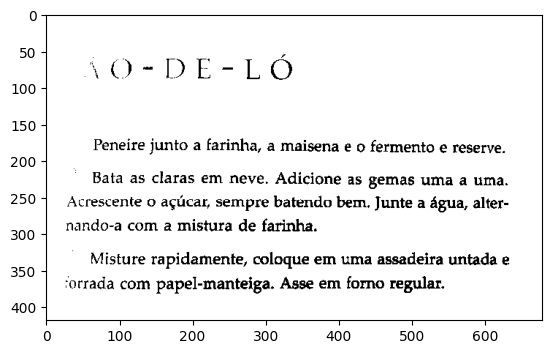

In [63]:
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(otsu, cmap='gray')
print(value)

## Adaptive Thresholding

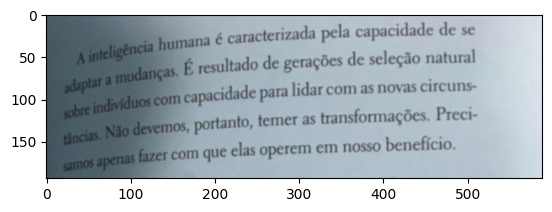

In [64]:
img = cv2.imread('Sources/Images/book02.jpg')
plt.imshow(img)

147.0


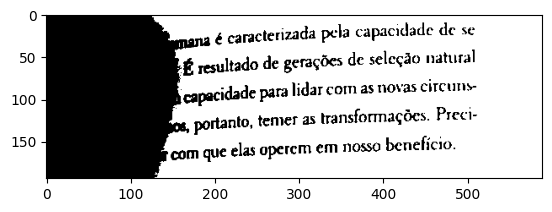

In [65]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
value, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(otsu, cmap='gray')
print(value)

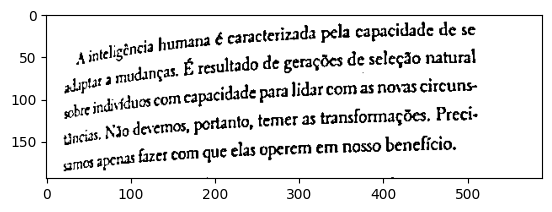

In [66]:
adaptive_average = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
plt.imshow(adaptive_average, cmap='gray')

## Gaussian Adaptive thresholding

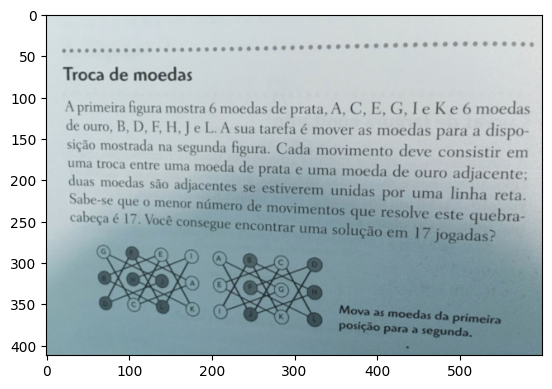

In [67]:
img = cv2.imread('Sources/Images/book_adaptative.jpg')
plt.imshow(img)

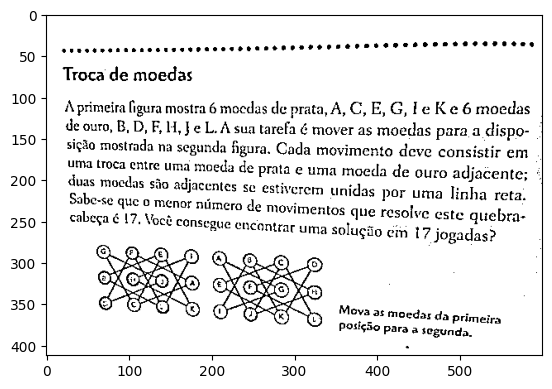

In [68]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adaptive_gaussian = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
plt.imshow(adaptive_gaussian, cmap='gray')

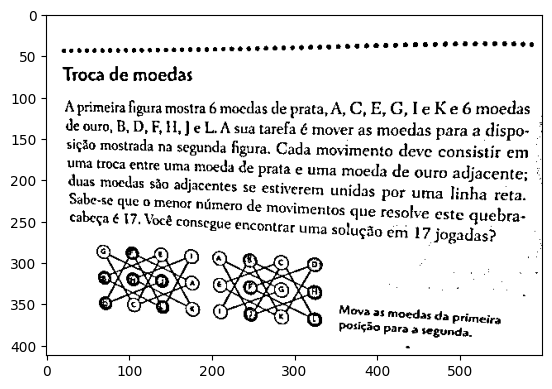

In [69]:
adaptive_median = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
plt.imshow(adaptive_median, cmap='gray')

## Color inversion

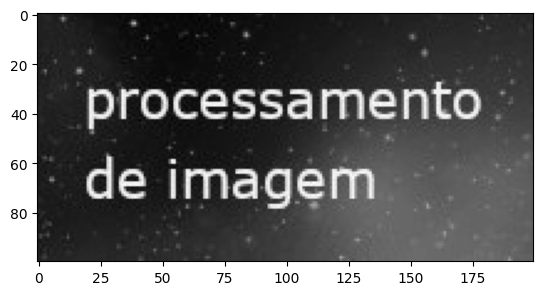

In [70]:
img = cv2.imread('Sources/Images/img-process.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [71]:
img.shape, gray.shape

((100, 200, 3), (100, 200))

In [72]:
print(gray)

[[ 68  70  72 ...  76  74  74]
 [ 68  70  73 ...  75  74  77]
 [ 70  70  72 ...  74  73  76]
 ...
 [ 67  69  82 ... 123 123 124]
 [ 70  76  92 ... 124 124 125]
 [ 70  70  80 ... 123 122 123]]


In [73]:
invert = 255-gray
print(invert)

[[187 185 183 ... 179 181 181]
 [187 185 182 ... 180 181 178]
 [185 185 183 ... 181 182 179]
 ...
 [188 186 173 ... 132 132 131]
 [185 179 163 ... 131 131 130]
 [185 185 175 ... 132 133 132]]


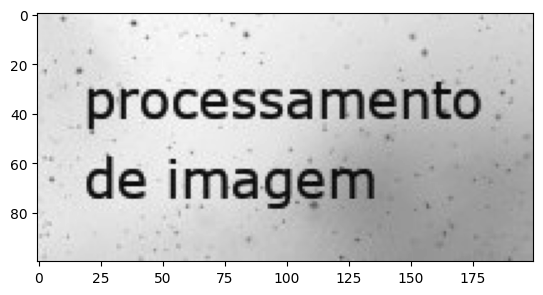

In [74]:
plt.imshow(invert, cmap='gray')

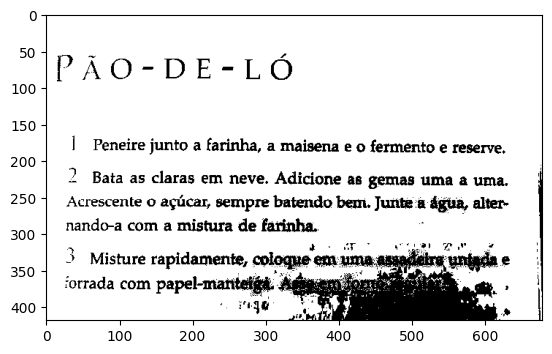

In [75]:
plt.imshow(thresh, cmap='gray')

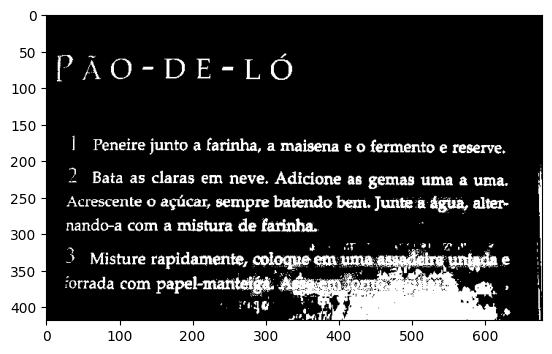

In [76]:
invert = (255 - thresh)
plt.imshow(invert, cmap='gray')

## Resizing
- INTER_NEAREST - a nearest neighbor interpolation. It is widely used because it is the fastest
- INTER_LINEAR - a bilinear interpolation (it's used by default), generally good for zooming in and out of images
- INTER_AREA - uses the pixel area ratio. May be a preferred method for image reduction as it provides good results
- INTER_CUBIC - bicubic (4x4 neighboring pixels). It has better results
- INTER_LANCZOS4 - Lanczos interpolation (8x8 neighboring pixels). Among these algorithms, it is the one with the best quality results.

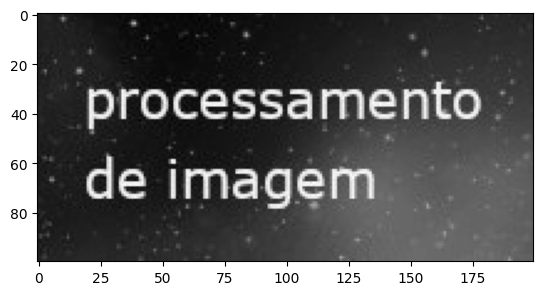

In [77]:
plt.imshow(gray, cmap='gray')

In [78]:
gray.shape

(100, 200)

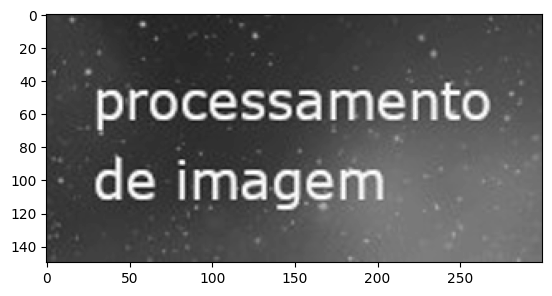

In [79]:
increase = cv2.resize(gray, None, fx = 1.5, fy = 1.5, interpolation = cv2.INTER_CUBIC)
plt.imshow(increase, cmap='gray')

In [80]:
increase.shape

(150, 300)

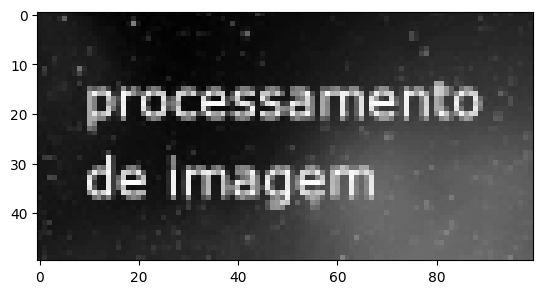

In [81]:
decrease = cv2.resize(gray, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_AREA)
plt.imshow(decrease, cmap='gray')

In [82]:
decrease.shape

(50, 100)

## Morphological operations

### Erosion

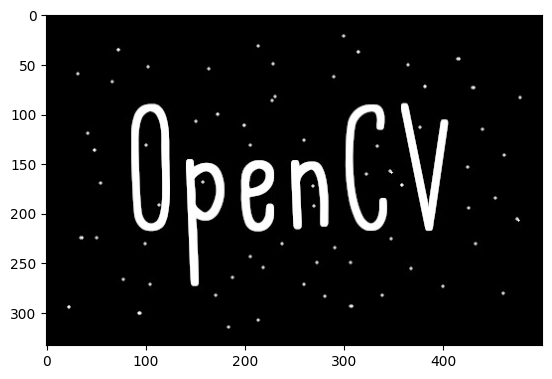

In [83]:
img = cv2.imread('Sources/Images/text-opencv.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [84]:
np.ones((3,3), dtype = np.uint8)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

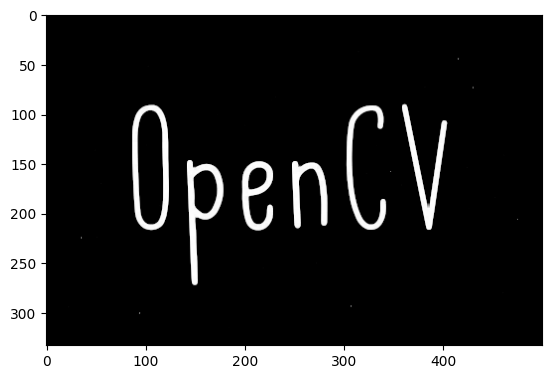

In [85]:
erosion = cv2.erode(gray, np.ones((3,3), dtype = np.uint8))
plt.imshow(erosion, cmap='gray')

### Dilation

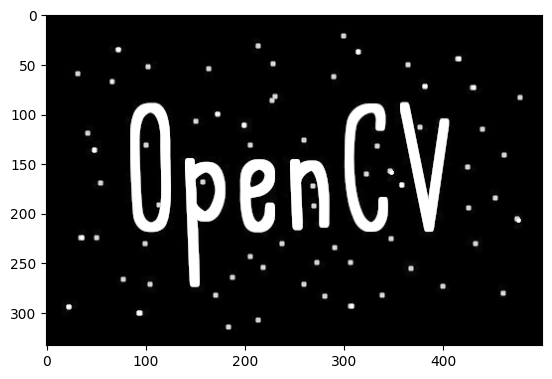

In [86]:
dilation = cv2.dilate(gray, np.ones((3,3), dtype = np.uint8))
plt.imshow(dilation, cmap='gray')

### Opening

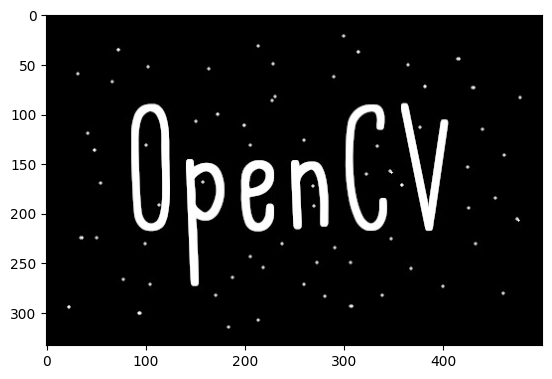

In [87]:
erosion  = cv2.erode(gray, np.ones((5, 5), dtype = np.uint8))
opening = cv2.dilate(erosion, np.ones((5, 5), np.uint8))
plt.imshow(gray, cmap='gray')


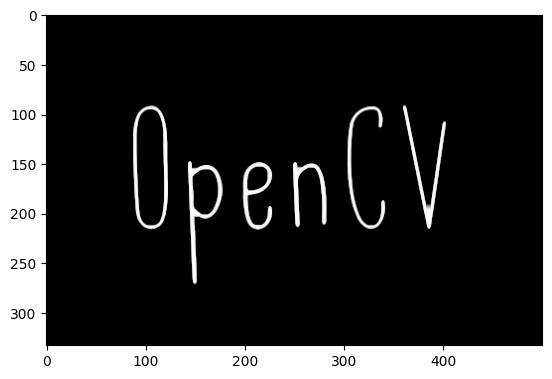

In [88]:
plt.imshow(erosion, cmap='gray')

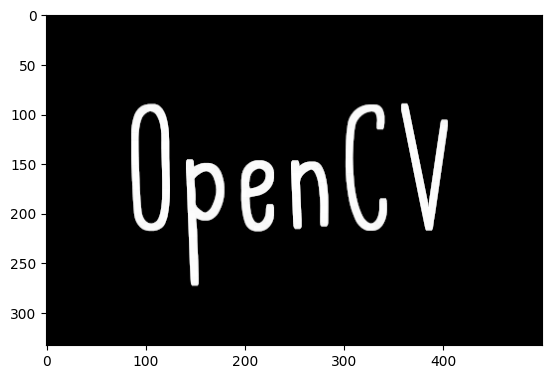

In [89]:
plt.imshow(opening, cmap='gray')


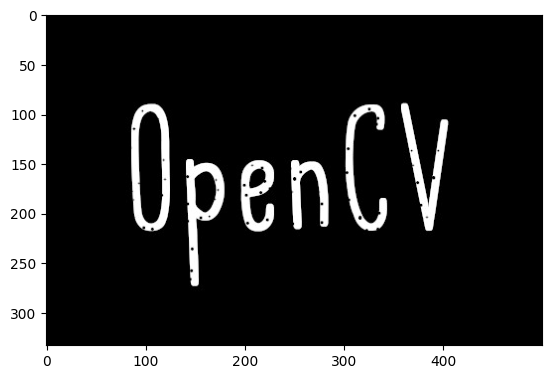

In [90]:
img = cv2.imread('Sources/Images/text-opencv2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

dilation = cv2.dilate(gray, np.ones((5, 5), dtype = np.uint8))
closing = cv2.erode(dilation, np.ones((5, 5), np.uint8))
plt.imshow(dilation, cmap='gray')

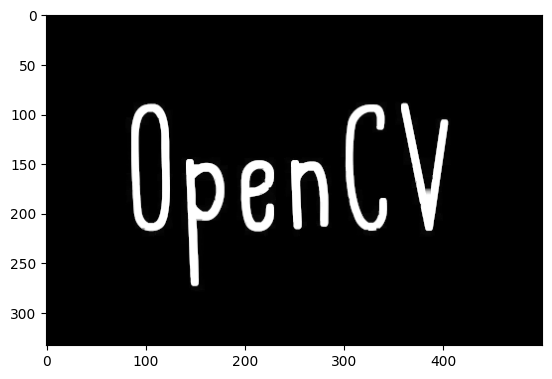

In [92]:
plt.imshow(closing, cmap='gray')

## Noise Removal

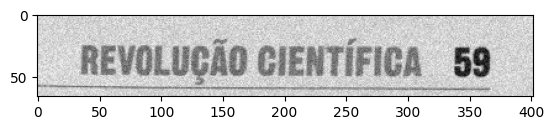

In [93]:
img = cv2.imread('Sources/Images/test_noise.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

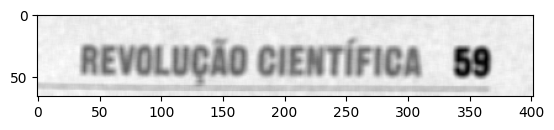

In [100]:
average_blur = cv2.blur(gray, (5,5))
plt.imshow(average_blur, cmap='gray')

### Gaussian Blur

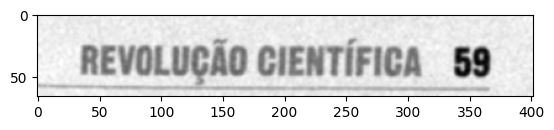

In [95]:
gaussian_blur = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(gaussian_blur, cmap='gray')

### Median Blur

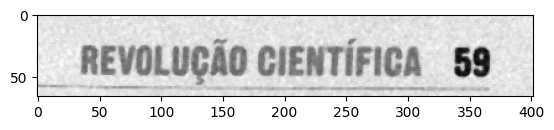

In [96]:
median_blur = cv2.medianBlur(gray, 3)
plt.imshow(median_blur, cmap='gray')

### Bilateral filter

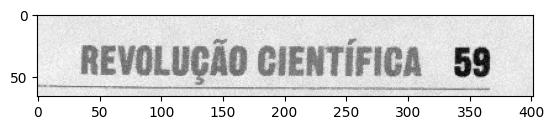

In [97]:
bilateral_filter = cv2.bilateralFilter(gray, 15, 15, 45)
plt.imshow(bilateral_filter, cmap='gray')

## Text Detection

In [106]:
import pytesseract

config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(average_blur, lang='por', config=config_tesseract)
print(text)

In [107]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(median_blur, lang='por', config=config_tesseract)
print(text)

— REVOLUÇÃO CIENTÍFICA 59


## Homework

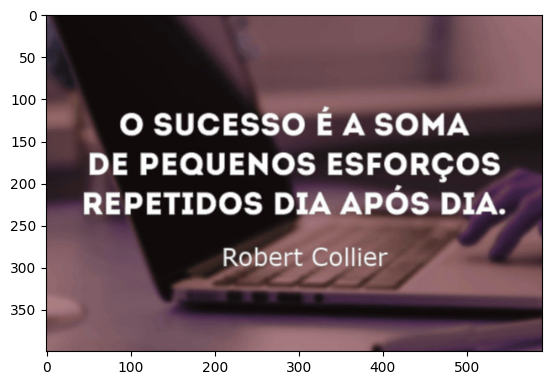

In [108]:
img = cv2.imread('Sources/Images/sentence.jpg')
plt.imshow(img)

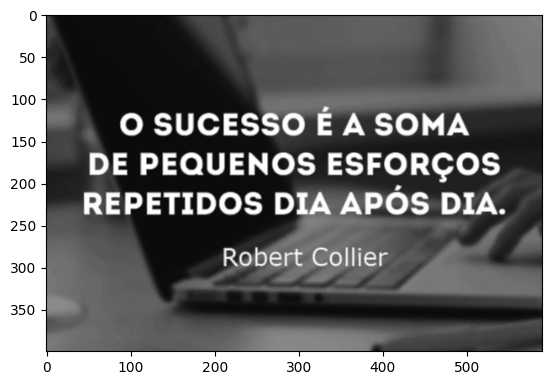

In [109]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

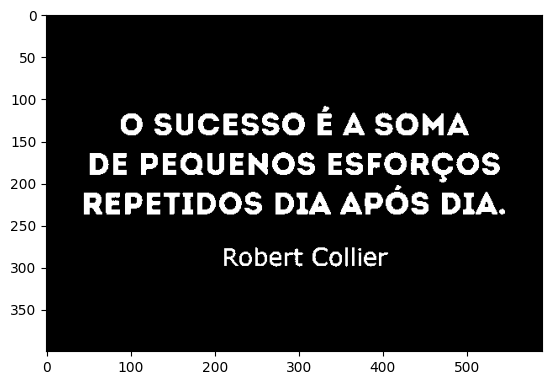

In [111]:
value, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(otsu, cmap='gray')

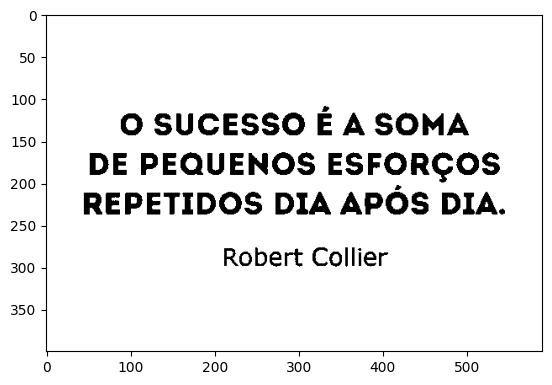

In [113]:
invert = 255 - thresh
plt.imshow(invert, cmap='gray')

In [114]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(invert, lang='por', config=config_tesseract)
print(text)

O SUCESSO É A SOMA
DE PEQUENOS ESFORÇOS
REPETIDOS DIA APÓS DIA.

Robert Collier
